In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import requests
from io import BytesIO

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("Set2")
%matplotlib inline

In [2]:
def plot_confusion_matrix(y, y_predict):
    """Función para plotear la matriz de confusión"""
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [3]:
# Descargar datasets
def download_data(url):
    response = requests.get(url)
    return BytesIO(response.content)

# URL de los datasets
url_part_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
url_part_3 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Cargar datos
data = pd.read_csv(download_data(url_part_2))
X = pd.read_csv(download_data(url_part_3))

print("Dataset Part 2 - Shape:", data.shape)
print("Dataset Part 3 - Shape:", X.shape)
print("\nPrimeras filas de Dataset Part 2:")
print(data.head())
print("\nPrimeras filas de Dataset Part 3:")
print(X.head())

Dataset Part 2 - Shape: (90, 18)
Dataset Part 3 - Shape: (90, 83)

Primeras filas de Dataset Part 2:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   

# TASK 1: Crear variable objetivo Y

In [4]:
Y = data['Class'].to_numpy()
print("Variable Y shape:", Y.shape)
print("Distribución de clases:")
print(pd.Series(Y).value_counts())
print("Proporción:")
print(pd.Series(Y).value_counts(normalize=True))

Variable Y shape: (90,)
Distribución de clases:
1    60
0    30
Name: count, dtype: int64
Proporción:
1    0.666667
0    0.333333
Name: proportion, dtype: float64


# TASK 2: Estandarizar los datos

In [5]:
# Estandarizar las características
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)

print("Datos estandarizados - Shape:", X_scaled.shape)
print("Media después de estandarización:", np.mean(X_scaled, axis=0))
print("Desviación estándar después de estandarización:", np.std(X_scaled, axis=0))

Datos estandarizados - Shape: (90, 83)
Media después de estandarización: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17 -4.81096644e-17 -2.86807615e-17 -7.40148683e-18
 -4.81096644e-17  4.68760833e-17  6.16790569e-18  0.00000000e+00
 -6.90805438e-17 -2.86807615e-17 -5.24271984e-17  1.78869265e-17
 -8.14163551e-17  2.71387850e-17  5.30439890e-17  5.30439890e-17
 -1.41861831e-17 -1.48029737e-17  6.16790569e-18  3.08395285e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -3.70074342e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17  5.55111512e-18 -4.81096644e-17  5.55111512e-18
  5.55111512e-18 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -4.81096644e-17 

# TASK 3: Dividir datos en entrenamiento y prueba

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

print(f"Conjunto de entrenamiento: X_train={X_train.shape}, Y_train={Y_train.shape}")
print(f"Conjunto de prueba: X_test={X_test.shape}, Y_test={Y_test.shape}")
print(f"Proporción de clases en entrenamiento: {np.bincount(Y_train)/len(Y_train)}")
print(f"Proporción de clases en prueba: {np.bincount(Y_test)/len(Y_test)}")

Conjunto de entrenamiento: X_train=(72, 83), Y_train=(72,)
Conjunto de prueba: X_test=(18, 83), Y_test=(18,)
Proporción de clases en entrenamiento: [0.33333333 0.66666667]
Proporción de clases en prueba: [0.33333333 0.66666667]


# TASK 4: Regresión Logística con GridSearchCV


In [7]:
# Definir parámetros para GridSearch
parameters_lr = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Crear y entrenar el modelo
lr = LogisticRegression(random_state=2, max_iter=1000)
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10, scoring='accuracy', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)

print("Mejores parámetros para Regresión Logística:", logreg_cv.best_params_)
print("Mejor score de validación cruzada:", logreg_cv.best_score_)

Mejores parámetros para Regresión Logística: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor score de validación cruzada: 0.8464285714285713


# TASK 5: Evaluar Regresión Logística en test

Precisión de Regresión Logística en test: 0.8333

Matriz de Confusión - Regresión Logística:


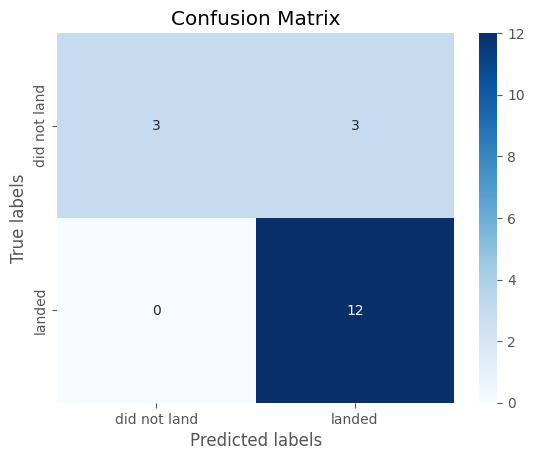


Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

 No aterrizó       1.00      0.50      0.67         6
    Aterrizó       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [8]:
# Precisión en test
lr_test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Precisión de Regresión Logística en test: {lr_test_accuracy:.4f}")

# Matriz de confusión
yhat_lr = logreg_cv.predict(X_test)
print("\nMatriz de Confusión - Regresión Logística:")
plot_confusion_matrix(Y_test, yhat_lr)

# Reporte de clasificación
print("\nReporte de Clasificación - Regresión Logística:")
print(classification_report(Y_test, yhat_lr, target_names=['No aterrizó', 'Aterrizó']))

# TASK 6: SVM con GridSearchCV

In [9]:
# Definir parámetros para SVM
parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Crear y entrenar el modelo SVM
svm = SVC(random_state=2)
svm_cv = GridSearchCV(svm, parameters_svm, cv=10, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, Y_train)

print("Mejores parámetros para SVM:", svm_cv.best_params_)
print("Mejor score de validación cruzada:", svm_cv.best_score_)

Mejores parámetros para SVM: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Mejor score de validación cruzada: 0.8482142857142856


# TASK 7: Evaluar SVM en test


Precisión de SVM en test: 0.8333

Matriz de Confusión - SVM:


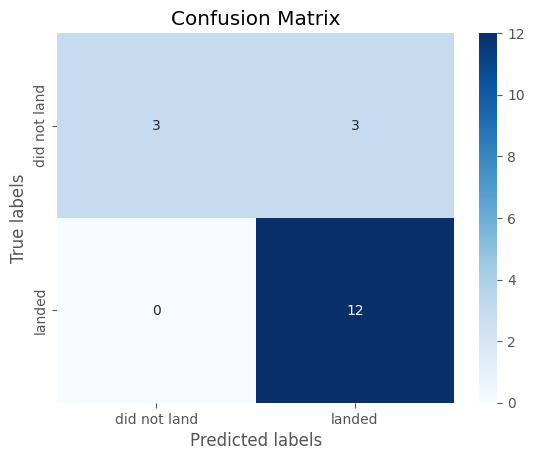


Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

 No aterrizó       1.00      0.50      0.67         6
    Aterrizó       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [10]:
# Precisión en test
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Precisión de SVM en test: {svm_test_accuracy:.4f}")

# Matriz de confusión
yhat_svm = svm_cv.predict(X_test)
print("\nMatriz de Confusión - SVM:")
plot_confusion_matrix(Y_test, yhat_svm)

# Reporte de clasificación
print("\nReporte de Clasificación - SVM:")
print(classification_report(Y_test, yhat_svm, target_names=['No aterrizó', 'Aterrizó']))

# TASK 8: Árbol de Decisión con GridSearchCV

In [11]:
# Definir parámetros para Árbol de Decisión
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters_tree, cv=10, scoring='accuracy', n_jobs=-1)
tree_cv.fit(X_train, Y_train)

print("Mejores parámetros para Árbol de Decisión:", tree_cv.best_params_)
print("Mejor score de validación cruzada:", tree_cv.best_score_)

Mejores parámetros para Árbol de Decisión: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Mejor score de validación cruzada: 0.8714285714285713


# TASK 9: Evaluar Árbol de Decisión en test

Precisión de Árbol de Decisión en test: 0.7778

Matriz de Confusión - Árbol de Decisión:


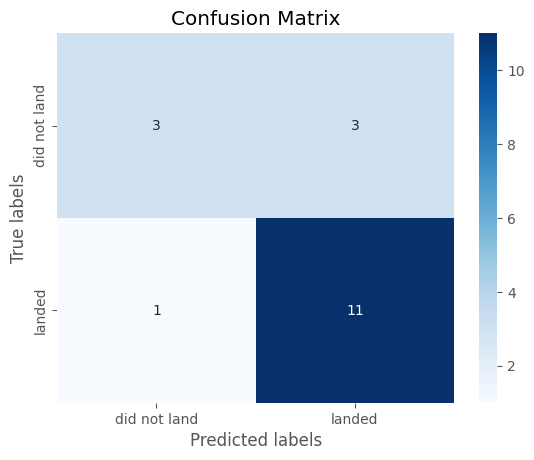


Reporte de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

 No aterrizó       0.75      0.50      0.60         6
    Aterrizó       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18



In [12]:
# Precisión en test
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Precisión de Árbol de Decisión en test: {tree_test_accuracy:.4f}")

# Matriz de confusión
yhat_tree = tree_cv.predict(X_test)
print("\nMatriz de Confusión - Árbol de Decisión:")
plot_confusion_matrix(Y_test, yhat_tree)

# Reporte de clasificación
print("\nReporte de Clasificación - Árbol de Decisión:")
print(classification_report(Y_test, yhat_tree, target_names=['No aterrizó', 'Aterrizó']))

# TASK 10: KNN con GridSearchCV


In [13]:
# Definir parámetros para KNN
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Crear y entrenar el modelo
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10, scoring='accuracy', n_jobs=-1)
knn_cv.fit(X_train, Y_train)

print("Mejores parámetros para KNN:", knn_cv.best_params_)
print("Mejor score de validación cruzada:", knn_cv.best_score_)

Mejores parámetros para KNN: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Mejor score de validación cruzada: 0.8482142857142858


# TASK 11: Evaluar KNN en test

Precisión de KNN en test: 0.8333

Matriz de Confusión - KNN:


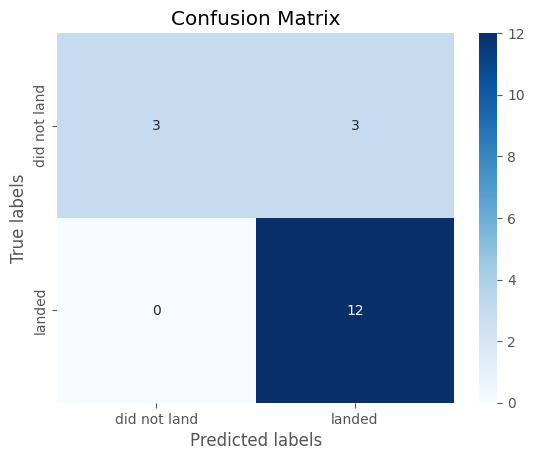


Reporte de Clasificación - KNN:
              precision    recall  f1-score   support

 No aterrizó       1.00      0.50      0.67         6
    Aterrizó       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [14]:
# Precisión en test
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"Precisión de KNN en test: {knn_test_accuracy:.4f}")

# Matriz de confusión
yhat_knn = knn_cv.predict(X_test)
print("\nMatriz de Confusión - KNN:")
plot_confusion_matrix(Y_test, yhat_knn)

# Reporte de clasificación
print("\nReporte de Clasificación - KNN:")
print(classification_report(Y_test, yhat_knn, target_names=['No aterrizó', 'Aterrizó']))

# TASK 12: Comparación de modelos

COMPARACIÓN DE MODELOS:
             Modelo  Mejor Score CV  Precisión Test                                                                                       Mejores Parámetros
Regresión Logística        0.846429        0.833333                                                          {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
                SVM        0.848214        0.833333                                            {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
                KNN        0.848214        0.833333                                                         {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
  Árbol de Decisión        0.871429        0.777778 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


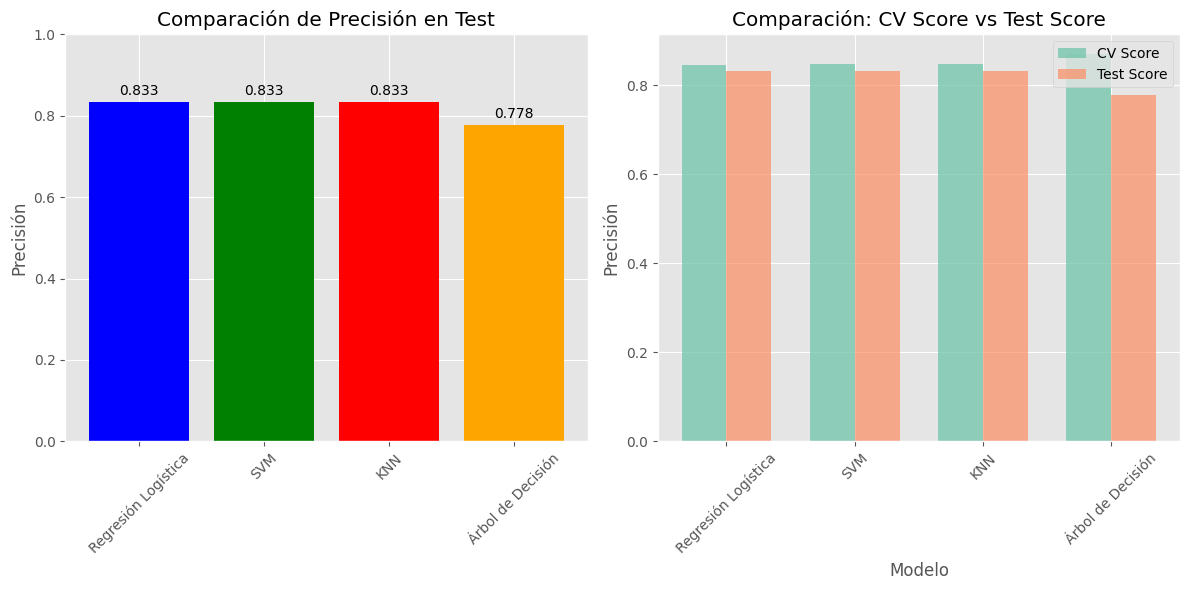


MEJOR MODELO: Regresión Logística
Precisión en Test: 0.8333
Parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [15]:
# Crear DataFrame con resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'SVM', 'Árbol de Decisión', 'KNN'],
    'Mejor Score CV': [
        logreg_cv.best_score_,
        svm_cv.best_score_,
        tree_cv.best_score_,
        knn_cv.best_score_
    ],
    'Precisión Test': [
        lr_test_accuracy,
        svm_test_accuracy,
        tree_test_accuracy,
        knn_test_accuracy
    ],
    'Mejores Parámetros': [
        logreg_cv.best_params_,
        svm_cv.best_params_,
        tree_cv.best_params_,
        knn_cv.best_params_
    ]
})

# Ordenar por precisión en test
results = results.sort_values('Precisión Test', ascending=False)

print("COMPARACIÓN DE MODELOS:")
print("=" * 50)
print(results.to_string(index=False))

# Visualización comparativa
plt.figure(figsize=(12, 6))

# Gráfico de barras para comparar accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(results['Modelo'], results['Precisión Test'], color=['blue', 'green', 'red', 'orange'])
plt.title('Comparación de Precisión en Test')
plt.ylabel('Precisión')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Añadir valores en las barras
for bar, value in zip(bars, results['Precisión Test']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Gráfico de comparación entre CV score y Test score
plt.subplot(1, 2, 2)
x_pos = np.arange(len(results['Modelo']))
width = 0.35

plt.bar(x_pos - width/2, results['Mejor Score CV'], width, label='CV Score', alpha=0.7)
plt.bar(x_pos + width/2, results['Precisión Test'], width, label='Test Score', alpha=0.7)

plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación: CV Score vs Test Score')
plt.xticks(x_pos, results['Modelo'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Identificar el mejor modelo
best_model = results.iloc[0]
print(f"\nMEJOR MODELO: {best_model['Modelo']}")
print(f"Precisión en Test: {best_model['Precisión Test']:.4f}")
print(f"Parámetros: {best_model['Mejores Parámetros']}")

# Análisis de Resultados y Conclusiones


In [16]:
print("=" * 60)
print("ANÁLISIS DE RESULTADOS Y CONCLUSIONES")
print("=" * 60)

print("1. COMPARACIÓN DE RENDIMIENTO:")
for _, row in results.iterrows():
    print(f"   - {row['Modelo']}: Test Accuracy = {row['Precisión Test']:.3f}")

print("\n2. MEJOR MODELO:")
print(f"   El mejor modelo es {best_model['Modelo']} con una precisión de {best_model['Precisión Test']:.3f}")

print("\n3. OBSERVACIONES:")
print("   - La diferencia entre el score de validación cruzada y el test score indica")
print("     qué tan bien generaliza cada modelo")
print("   - Un buen modelo debería tener scores similares en CV y Test")
print("   - La matriz de confusión muestra el tipo de errores que comete cada modelo")

print("\n4. IMPLICACIONES PARA SPACEX:")
print("   - Un modelo preciso puede ayudar a predecir el éxito del aterrizaje")
print("   - Esto es crucial para la reutilización de cohetes y reducción de costos")
print("   - Los falsos positivos (predecir aterrizaje cuando no ocurre) pueden ser costosos")
print("   - Los falsos negativos (predecir fallo cuando aterriza) son menos críticos")

print("\n5. RECOMENDACIONES:")
print("   - Utilizar el mejor modelo para predicciones futuras")
print("   - Monitorear continuamente el rendimiento del modelo")
print("   - Considerar la incorporación de más características relevantes")
print("   - Implementar un sistema de monitoreo de drift de datos")

ANÁLISIS DE RESULTADOS Y CONCLUSIONES
1. COMPARACIÓN DE RENDIMIENTO:
   - Regresión Logística: Test Accuracy = 0.833
   - SVM: Test Accuracy = 0.833
   - KNN: Test Accuracy = 0.833
   - Árbol de Decisión: Test Accuracy = 0.778

2. MEJOR MODELO:
   El mejor modelo es Regresión Logística con una precisión de 0.833

3. OBSERVACIONES:
   - La diferencia entre el score de validación cruzada y el test score indica
     qué tan bien generaliza cada modelo
   - Un buen modelo debería tener scores similares en CV y Test
   - La matriz de confusión muestra el tipo de errores que comete cada modelo

4. IMPLICACIONES PARA SPACEX:
   - Un modelo preciso puede ayudar a predecir el éxito del aterrizaje
   - Esto es crucial para la reutilización de cohetes y reducción de costos
   - Los falsos positivos (predecir aterrizaje cuando no ocurre) pueden ser costosos
   - Los falsos negativos (predecir fallo cuando aterriza) son menos críticos

5. RECOMENDACIONES:
   - Utilizar el mejor modelo para predicci